In [49]:
import numpy as np
import pandas as pd  
import markdown 
import scipy.stats
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

#импортируем библиотеки, которые помогут проанализировать данные

In [50]:
df_salary = pd.read_csv("Downloads/df_salary2.csv")

#импортируем датасет

In [51]:
df_salary.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0000,Male,Munich,Software Engineer,5.0000,3,Senior,TypeScript,Kotlin. Javascript / Typescript,...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0000,Male,Berlin,Backend Developer,7.0000,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0000,Male,Berlin,Software Engineer,12.0000,6,Lead,Javascript / Typescript,Javascript / Typescript. Docker,...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0000,Male,Berlin,Frontend Developer,4.0000,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0000,Male,Berlin,Backend Developer,17.0000,6,Senior,C# .NET,.NET. SQL. AWS. Docker,...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [52]:
df_salary [:3]

#третий шаг - выводим данные 

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0000,Male,Munich,Software Engineer,5.0000,3,Senior,TypeScript,Kotlin. Javascript / Typescript,...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0000,Male,Berlin,Backend Developer,7.0000,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0000,Male,Berlin,Software Engineer,12.0000,6,Lead,Javascript / Typescript,Javascript / Typescript. Docker,...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN


Определяем вопрос исследования, он будет звучать так: Правда ли, что мужчины среднего возраста более опытны и больше зарабатывают, чем женщины?

In [53]:
df_salary = df_salary.drop(columns=['Timestamp', 'Number of vacation days', "City", 'Years of experience in Germany', "Seniority level",
                                    'Have you lost your job due to the coronavirus outbreak?', "Company type", "Company size", "Main language at work",
                                    'Your main technology / programming language', 'Other technologies/programming languages you use often', "Employment status", "Сontract duration",
                                    'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 
                                    "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR", ]) 
#удаляем столбцы, которые нам больше не понадобятся

In [54]:
df_salary = df_salary.drop(columns=['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', "Annual bonus+stocks one year ago. Only answer if staying in same country"]) 

#удаляем столбцы, которые нам больше не понадобятся

In [55]:
df_salary_cols =  ['Возраст', 'Пол', 'Должность', 'Лет опыта', 
            'Годовая зарплата в евро', 'Годовой бонус в евро']
#меняем название колонок

In [56]:
df_salary.columns = df_salary_cols

In [57]:
df_salary

,Возраст,Пол,Должность,Лет опыта,Годовая зарплата в евро,Годовой бонус в евро
0,26.0000,Male,Software Engineer,5.0000,80000.0000,5000.0000
1,26.0000,Male,Backend Developer,7.0000,80000.0000,NaN
2,29.0000,Male,Software Engineer,12.0000,120000.0000,120000.0000
3,28.0000,Male,Frontend Developer,4.0000,54000.0000,NaN
4,37.0000,Male,Backend Developer,17.0000,62000.0000,NaN
...,...,...,...,...,...,...
1248,31.0000,Male,Backend Developer,9.0000,70000.0000,72000.0000
1249,33.0000,Male,Researcher/ Consumer Insights Analyst,10.0000,60000.0000,3000.0000
1250,39.0000,Male,IT Operations Manager,15.0000,110000.0000,0.0000
1251,26.0000,Male,Frontend Developer,7.0000,38350.0000,40950.0000


<AxesSubplot:>

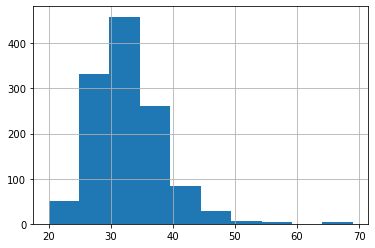

In [58]:
df_salary['Возраст'].hist()

In [59]:
def get_age_cat(age):
    if age < 25:
        return 'Очень Молодой'
    elif 25 <= age < 30:
        return 'Молодой'
    elif 30 <= age < 40:
        return 'Средний'
    elif 40 <= age < 50:
        return 'Взрослый'
    elif age >= 50:
        return 'Очень взрослый'
    else:
        return age
#вводим новую переменную и определяем ее значения

In [60]:
df_salary['Возраст_кат'] = df_salary['Возраст'].apply(get_age_cat)

In [61]:
df_salary['Возраст_кат'] = pd.Categorical(df_salary['Возраст_кат'])
#делаем переменную категориальной

In [62]:
df_salary['Лет опыта'].value_counts()

10.0000     138
5.0000      136
6.0000      100
8.0000       92
7.0000       84
4.0000       80
12.0000      67
3.0000       66
15.0000      64
9.0000       60
2.0000       57
11.0000      43
13.0000      41
14.0000      39
1.0000       32
20.0000      28
16.0000      20
18.0000      16
17.0000      12
19.0000       7
25.0000       7
0.0000        6
22.0000       5
2.5000        5
30.0000       4
1.5000        4
21.0000       3
23.0000       2
27.0000       2
4.5000        2
3.5000        2
0.8000        2
26.0000       1
6.5000        1
28.0000       1
29.0000       1
24.0000       1
5.5000        1
40.0000       1
31.0000       1
383.0000      1
7.5000        1
Name: Лет опыта, dtype: int64

In [63]:
def get_exp_cat(exp):
    if exp < 3:
        return 'Очень мало опыта'
    elif 3 <= exp < 5:
        return 'Мало опыта'
    elif 5 <= exp <= 10:
        return 'Средний опыт'
    elif 10 < exp <= 15:
        return 'Много опыта'
    elif exp >= 15:
        return 'Очень опытный'
    else:
        return exp
#вводим новую переменную и определяем ее значения

In [64]:
df_salary['Лет опыта_кат'] = df_salary['Лет опыта'].apply(get_exp_cat)

In [65]:
df_salary['Лет опыта_кат'] = pd.Categorical(df_salary['Лет опыта_кат'])
#делаем переменную категориальной

In [66]:
df_salary['Общий доход за год в евро'] = df_salary.loc[:,['Годовая зарплата в евро','Годовой бонус в евро']].sum(axis=1)

#складываем данные из двух столбцов, чтобы получить общий доход за год

In [67]:
def get_slr_cat(slr):
    if slr < 30000:
        return 'Очень маленький доход'
    elif 30000 <= slr < 50000:
        return 'Маленький доход'
    elif 50000 <= slr <= 75000:
        return 'Средний доход'
    elif 75000 < slr <= 100000:
        return 'Доход выше среднего'
    elif 100000 < slr <= 150000:
        return 'Высокий доход'
    elif slr >= 150000:
        return 'Очень высокий доход'
    else:
        return slr
#вводим новую переменную и определяем ее значения

In [68]:
df_salary['Общий доход в евро за год_кат'] = df_salary['Общий доход за год в евро'].apply(get_slr_cat)
#деляем переменную категориальной

In [69]:
df_salary

,Возраст,Пол,Должность,Лет опыта,Годовая зарплата в евро,Годовой бонус в евро,Возраст_кат,Лет опыта_кат,Общий доход за год в евро,Общий доход в евро за год_кат
0,26.0000,Male,Software Engineer,5.0000,80000.0000,5000.0000,Молодой,Средний опыт,85000.0000,Доход выше среднего
1,26.0000,Male,Backend Developer,7.0000,80000.0000,NaN,Молодой,Средний опыт,80000.0000,Доход выше среднего
2,29.0000,Male,Software Engineer,12.0000,120000.0000,120000.0000,Молодой,Много опыта,240000.0000,Очень высокий доход
3,28.0000,Male,Frontend Developer,4.0000,54000.0000,NaN,Молодой,Мало опыта,54000.0000,Средний доход
4,37.0000,Male,Backend Developer,17.0000,62000.0000,NaN,Средний,Очень опытный,62000.0000,Средний доход
...,...,...,...,...,...,...,...,...,...,...
1248,31.0000,Male,Backend Developer,9.0000,70000.0000,72000.0000,Средний,Средний опыт,142000.0000,Высокий доход
1249,33.0000,Male,Researcher/ Consumer Insights Analyst,10.0000,60000.0000,3000.0000,Средний,Средний опыт,63000.0000,Средний доход
1250,39.0000,Male,IT Operations Manager,15.0000,110000.0000,0.0000,Средний,Много опыта,110000.0000,Высокий доход
1251,26.0000,Male,Frontend Developer,7.0000,38350.0000,40950.0000,Молодой,Средний опыт,79300.0000,Доход выше среднего


In [70]:
df_salary['Общий доход в евро за год_кат'] = pd.Categorical(df_salary['Общий доход в евро за год_кат'])
#делаем переменную категориальной

In [71]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Возраст                        1226 non-null   float64 
 1   Пол                            1243 non-null   object  
 2   Должность                      1247 non-null   object  
 3   Лет опыта                      1236 non-null   float64 
 4   Годовая зарплата в евро        1252 non-null   float64 
 5   Годовой бонус в евро           824 non-null    float64 
 6   Возраст_кат                    1226 non-null   category
 7   Лет опыта_кат                  1236 non-null   category
 8   Общий доход за год в евро      1253 non-null   float64 
 9   Общий доход в евро за год_кат  1253 non-null   category
dtypes: category(3), float64(5), object(2)
memory usage: 72.9+ KB


In [72]:
df_salary['Пол'] = df_salary['Пол'].replace({'Male': 'Мужчина'}, regex=True)
df_salary['Пол'] = df_salary['Пол'].replace({'Female': 'Женщина'}, regex=True)
df_salary['Пол'] = df_salary['Пол'].replace({'Diverse': 'Другое'}, regex=True)
#меняем название ответов в значениях строки

In [73]:
df_salary['Пол'] = pd.Categorical(df_salary['Пол'])
#делаем переменную категориальной

In [74]:
df_salary

,Возраст,Пол,Должность,Лет опыта,Годовая зарплата в евро,Годовой бонус в евро,Возраст_кат,Лет опыта_кат,Общий доход за год в евро,Общий доход в евро за год_кат
0,26.0000,Мужчина,Software Engineer,5.0000,80000.0000,5000.0000,Молодой,Средний опыт,85000.0000,Доход выше среднего
1,26.0000,Мужчина,Backend Developer,7.0000,80000.0000,NaN,Молодой,Средний опыт,80000.0000,Доход выше среднего
2,29.0000,Мужчина,Software Engineer,12.0000,120000.0000,120000.0000,Молодой,Много опыта,240000.0000,Очень высокий доход
3,28.0000,Мужчина,Frontend Developer,4.0000,54000.0000,NaN,Молодой,Мало опыта,54000.0000,Средний доход
4,37.0000,Мужчина,Backend Developer,17.0000,62000.0000,NaN,Средний,Очень опытный,62000.0000,Средний доход
...,...,...,...,...,...,...,...,...,...,...
1248,31.0000,Мужчина,Backend Developer,9.0000,70000.0000,72000.0000,Средний,Средний опыт,142000.0000,Высокий доход
1249,33.0000,Мужчина,Researcher/ Consumer Insights Analyst,10.0000,60000.0000,3000.0000,Средний,Средний опыт,63000.0000,Средний доход
1250,39.0000,Мужчина,IT Operations Manager,15.0000,110000.0000,0.0000,Средний,Много опыта,110000.0000,Высокий доход
1251,26.0000,Мужчина,Frontend Developer,7.0000,38350.0000,40950.0000,Молодой,Средний опыт,79300.0000,Доход выше среднего


In [75]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Возраст                        1226 non-null   float64 
 1   Пол                            1243 non-null   category
 2   Должность                      1247 non-null   object  
 3   Лет опыта                      1236 non-null   float64 
 4   Годовая зарплата в евро        1252 non-null   float64 
 5   Годовой бонус в евро           824 non-null    float64 
 6   Возраст_кат                    1226 non-null   category
 7   Лет опыта_кат                  1236 non-null   category
 8   Общий доход за год в евро      1253 non-null   float64 
 9   Общий доход в евро за год_кат  1253 non-null   category
dtypes: category(4), float64(5), object(1)
memory usage: 64.5+ KB


In [76]:
male_df = df_salary[(df_salary['Пол'] == 'Мужчина') & (df_salary['Возраст_кат'] == 'Средний')]
# создаем новую переменную для сравнения

In [77]:
female_df = df_salary[(df_salary['Пол'] == 'Женщина') & (df_salary['Возраст_кат'] == 'Средний')]
# создаем новую переменную для сравнения

После заведения новых переменных и обработки данных переходим к изучению центральных тенденций и мерам разброса


In [78]:
df_salary['Возраст'].sum() / len(df_salary['Возраст'])

#считаем средний возраст респондентов

31.80925778132482

<AxesSubplot:>

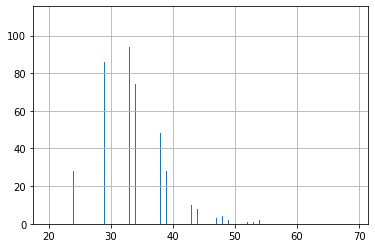

In [79]:
df_salary['Возраст'].hist(bins=1000)
#визуализируем распределние по возрастам

In [80]:
print(df_salary['Возраст'].mean())
print(df_salary['Возраст'].median())
print(df_salary['Возраст'].mode())

#определяем меры центральной тенденции

32.50978792822186
32.0
0   30.0000
Name: Возраст, dtype: float64


In [81]:
df_salary.describe()

#определяем меры разброса

,Возраст,Лет опыта,Годовая зарплата в евро,Годовой бонус в евро,Общий доход за год в евро
count,1226.0000,1236.0000,1252.0000,824.0000,1253.0000
mean,32.5098,9.0563,470958.7477,6089489.5673,4475163.4123
std,5.6638,11.8815,14128848.4692,174182510.8936,155374740.1575
min,20.0000,0.0000,10001.0000,0.0000,0.0000
25%,29.0000,5.0000,58600.0000,0.0000,60000.0000
50%,32.0000,8.0000,70000.0000,5000.0000,74000.0000
75%,35.0000,12.0000,80000.0000,20000.0000,91000.0000
max,69.0000,383.0000,500000000.0000,5000000000.0000,5500000000.0000


In [82]:
df_salary.groupby('Пол')['Общий доход за год в евро'].mean()
#определяем среднее по группам

Пол
Другое      162000.0000
Женщина   28711093.2552
Мужчина      89259.5230
Name: Общий доход за год в евро, dtype: float64

In [83]:
df_salary.groupby('Возраст_кат')['Общий доход за год в евро'].mean()
#определяем среднее по группам

Возраст_кат
Взрослый            96423.4324
Молодой          16637290.5546
Очень Молодой       74401.6490
Очень взрослый      93466.6667
Средний             91716.9501
Name: Общий доход за год в евро, dtype: float64

In [84]:
df_salary.groupby('Пол')['Лет опыта'].mean()
#определяем среднее по группам

Пол
Другое    1.0000
Женщина   6.2368
Мужчина   9.5877
Name: Лет опыта, dtype: float64

In [85]:
df_salary.groupby('Возраст_кат')['Лет опыта'].mean()
#определяем среднее по группам

Возраст_кат
Взрослый         16.0591
Молодой           5.1130
Очень Молодой     3.0224
Очень взрослый   58.8182
Средний           9.4378
Name: Лет опыта, dtype: float64

In [86]:
df_salary.groupby('Пол')['Общий доход за год в евро'].agg(func=['mean', 'median'])
#определяем среднее и медиану по группам

,mean,median
Пол,,
Другое,162000.0000,162000.0000
Женщина,28711093.2552,60000.0000
Мужчина,89259.5230,75000.0000


In [87]:
df_salary.groupby('Пол')['Лет опыта'].agg(func=['mean', 'median'])
#определяем среднее и медиану по группам

,mean,median
Пол,,
Другое,1.0000,1.0000
Женщина,6.2368,6.0000
Мужчина,9.5877,8.0000


Переходим к расчету z-оценки

In [88]:
X = df_salary['Общий доход за год в евро'][0] # извлекаем X — считаем z-оценку для первого студента
M = df_salary['Общий доход за год в евро'].mean()
sigma = df_salary['Общий доход за год в евро'].std(ddof=0)
print(X, M, sigma)
z_score = (X - M) / sigma
print(z_score)

85000.0 4475163.412274541 155312726.6885788
-0.0282666044559076


In [89]:
female_df['z-score'] = scipy.stats.zscore(female_df['Общий доход за год в евро'])
male_df['z-score'] = scipy.stats.zscore(male_df['Общий доход за год в евро'])

In [90]:
full = pd.concat([female_df, male_df])

<AxesSubplot:>

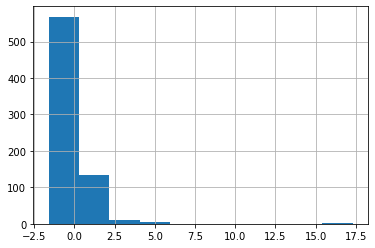

In [91]:
full['z-score'].hist()

In [92]:
full[full['z-score'] > 3]
#определяем выбросы

,Возраст,Пол,Должность,Лет опыта,Годовая зарплата в евро,Годовой бонус в евро,Возраст_кат,Лет опыта_кат,Общий доход за год в евро,Общий доход в евро за год_кат,z-score
398,32.0000,Женщина,Data Scientist,4.0000,85000.0000,88000.0000,Средний,Мало опыта,173000.0000,Очень высокий доход,4.4504
922,38.0000,Женщина,Data Scientist,14.0000,70000.0000,75000.0000,Средний,Много опыта,145000.0000,Высокий доход,3.2484
279,39.0000,Мужчина,Product Manager,10.0000,120000.0000,200000.0000,Средний,Средний опыт,320000.0000,Очень высокий доход,3.3973
441,32.0000,Мужчина,CTO,10.0000,200000.0000,200000.0000,Средний,Средний опыт,400000.0000,Очень высокий доход,4.6073
494,39.0000,Мужчина,Manager,11.0000,180000.0000,150000.0000,Средний,Много опыта,330000.0000,Очень высокий доход,3.5486
564,30.0000,Мужчина,Data Engineer,5.0000,90000.0000,1150000.0000,Средний,Средний опыт,1240000.0000,Очень высокий доход,17.3120
574,38.0000,Мужчина,Freelance AI lead / advisor,20.0000,200000.0000,200000.0000,Средний,Очень опытный,400000.0000,Очень высокий доход,4.6073
745,35.0000,Мужчина,Software Engineer,13.0000,103000.0000,200000.0000,Средний,Много опыта,303000.0000,Очень высокий доход,3.1402
966,35.0000,Мужчина,Data Engineer,6.0000,200000.0000,200000.0000,Средний,Средний опыт,400000.0000,Очень высокий доход,4.6073


In [93]:
full=full[full['z-score'] < 3]
#избавляемся от выбросов

Переходим к расчету корреляций

In [94]:
full['Лет опыта'].corr(full['Общий доход за год в евро'])

0.29423100386282486

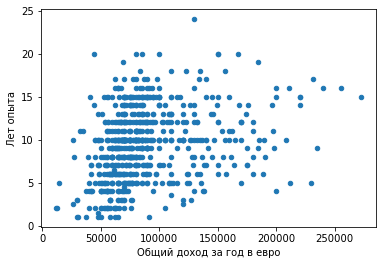

In [95]:
full.plot('Общий доход за год в евро','Лет опыта', kind='scatter')
plt.ticklabel_format(style='plain')
plt.ticklabel_format(useOffset=False)
#визуализируем 

Переходим к визуализации данных

In [96]:
gender_sallary = full.groupby(full['Пол'])['Общий доход за год в евро'].mean()
gender_sallary

Пол
Другое           NaN
Женщина   67652.9439
Мужчина   90851.4219
Name: Общий доход за год в евро, dtype: float64

<BarContainer object of 3 artists>

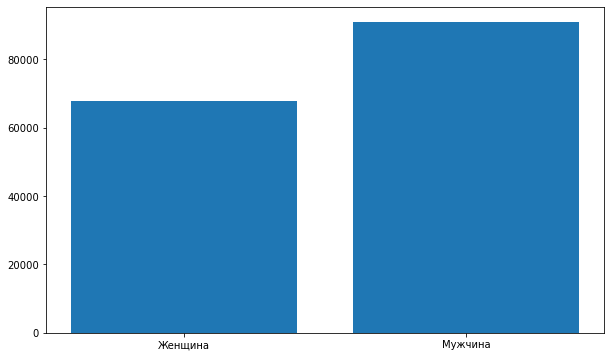

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(gender_sallary.index, gender_sallary)

In [98]:
exp_sallary = full.groupby(full['Пол'])['Лет опыта'].mean()
exp_sallary

Пол
Другое       NaN
Женщина   7.0236
Мужчина   9.8652
Name: Лет опыта, dtype: float64

<BarContainer object of 3 artists>

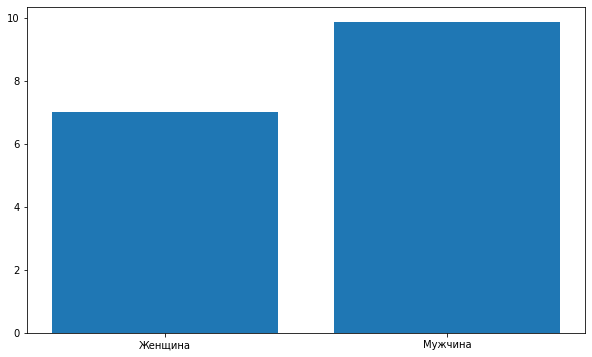

In [99]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(exp_sallary.index, exp_sallary)

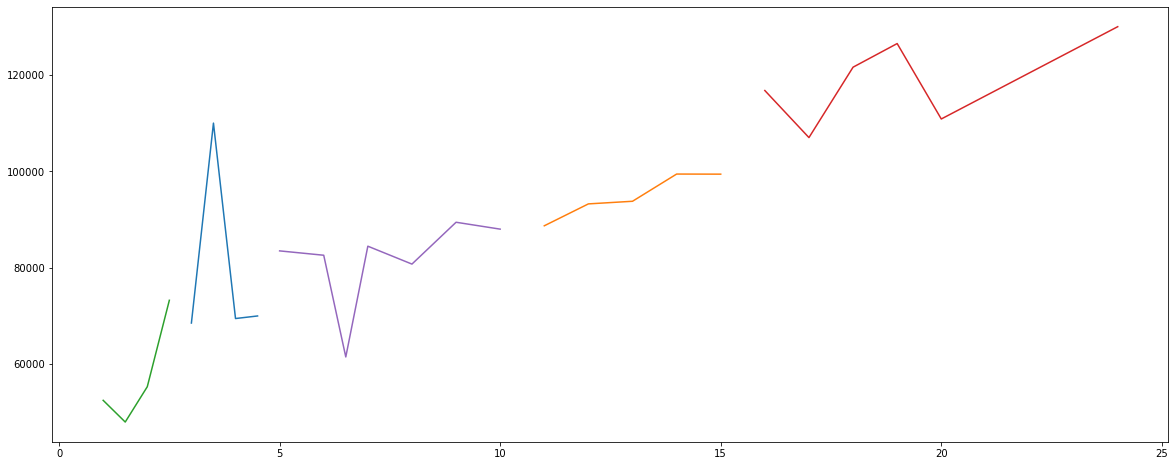

In [100]:
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(full.groupby(['Лет опыта_кат', 'Лет опыта'])['Общий доход за год в евро'].mean().loc['Мало опыта'])
ax.plot(full.groupby(['Лет опыта_кат', 'Лет опыта'])['Общий доход за год в евро'].mean().loc['Много опыта'])
ax.plot(full.groupby(['Лет опыта_кат', 'Лет опыта'])['Общий доход за год в евро'].mean().loc['Очень мало опыта'])
ax.plot(full.groupby(['Лет опыта_кат', 'Лет опыта'])['Общий доход за год в евро'].mean().loc['Очень опытный'])
ax.plot(full.groupby(['Лет опыта_кат', 'Лет опыта'])['Общий доход за год в евро'].mean().loc['Средний опыт'])

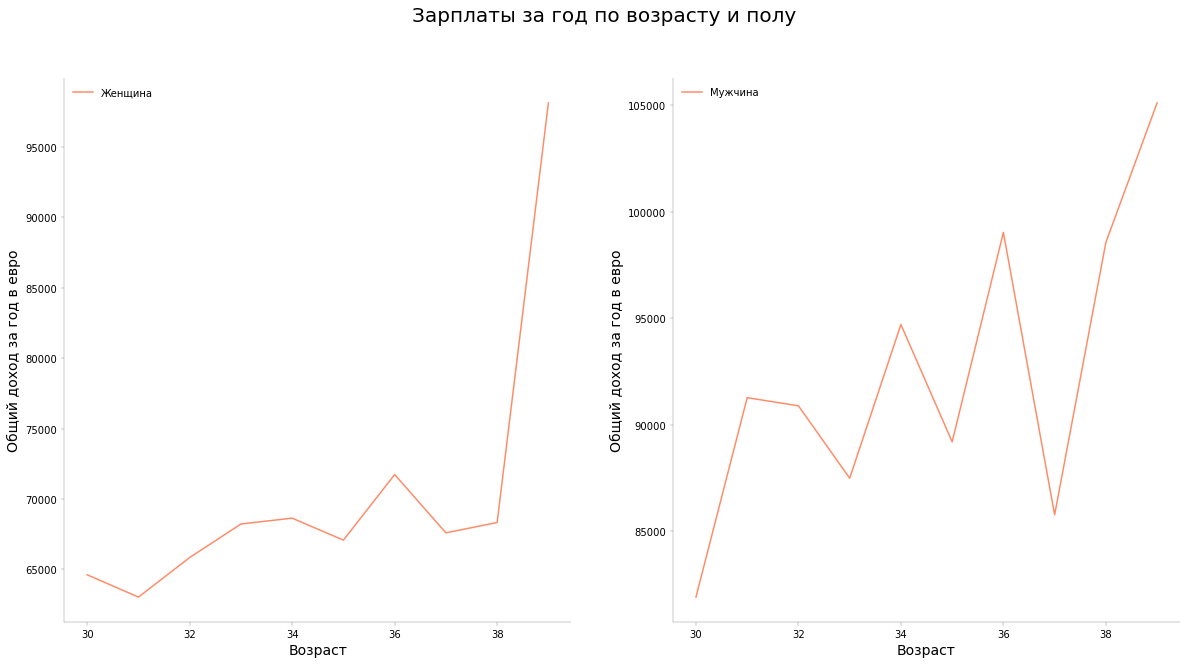

In [101]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

ax[0].plot(full.groupby(['Пол', 'Возраст'])['Общий доход за год в евро'].mean().loc['Женщина'], c='#ff8c69')
ax[1].plot(full.groupby(['Пол', 'Возраст'])['Общий доход за год в евро'].mean().loc['Мужчина'], c='#ff8c69')

for axis,gender in zip(ax.ravel(), ['Женщина', 'Мужчина']):
    axis.set_xlabel('Возраст', fontsize=14)
    axis.set_ylabel('Общий доход за год в евро', fontsize=14)
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['left'].set_linewidth(0.2)
    axis.spines['bottom'].set_linewidth(0.2)
    axis.xaxis.set_tick_params(width=0.2)
    axis.yaxis.set_tick_params(width=0.2)
    axis.legend([gender], frameon=False, loc=2)

        
fig.suptitle('Зарплаты за год по возрасту и полу', fontsize=20)
fig.savefig('temps.pdf')
fig.savefig('temps.png', dpi=100)

Вывод: согласно исследованию данных, мужчины среднего возраста более опытны и больше зарабатывают, чем женщины этого же возраста